In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report



In [2]:
data = pd.read_csv("Social_Network_Ads.csv")


In [3]:
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
211,15735878,Male,52,150000,1
378,15577806,Male,41,87000,1
21,15736760,Female,47,49000,1
397,15654296,Female,50,20000,1
267,15581282,Male,37,74000,0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
data.isna().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

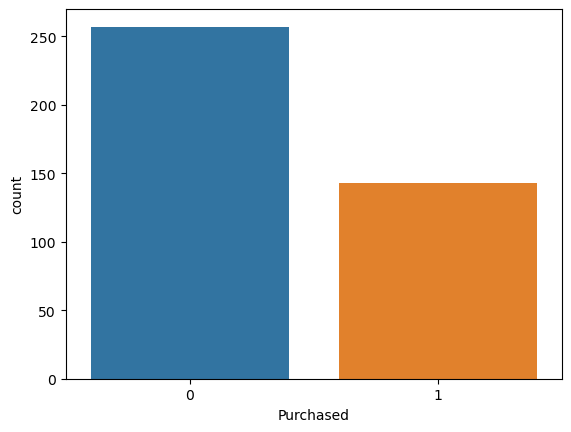

In [7]:
sns.countplot(data = data, x = 'Purchased');


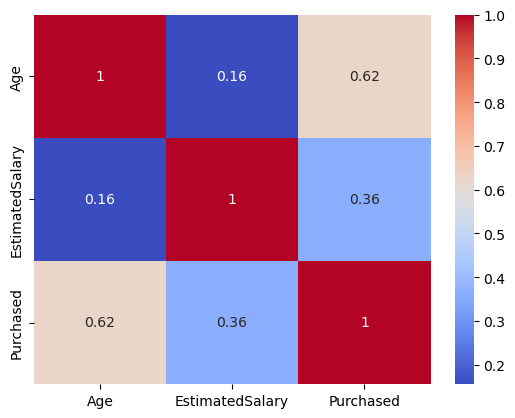

In [8]:
sns.heatmap(data[['Age','EstimatedSalary','Purchased']].corr(), annot = True, cmap= 'coolwarm' );


In [9]:
features = data[['Age', 'EstimatedSalary']]
label = data['Purchased']


In [10]:
scaler = StandardScaler()
features = scaler.fit_transform(features)


In [11]:
x = features
y = label


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [14]:
y_pred = model.predict(x_test)


In [15]:
y_pred


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

<AxesSubplot: >

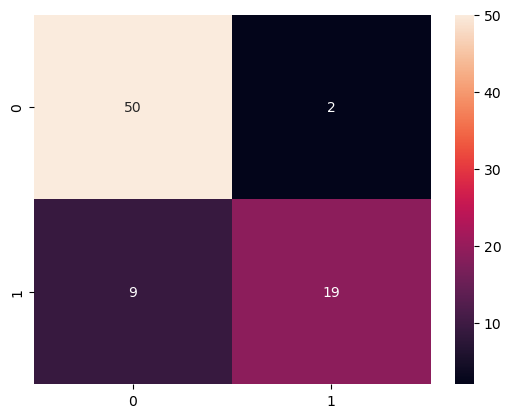

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

